In [130]:
import pyvips

# svg_image_data = pyvips.Image.svgload_buffer( svg_book_content.encode('utf-8'), dpi=300 )

# data = svg_image_data.write_to_buffer('.JPEG', Q=10)


In [131]:
# with open("./poem.svg", "r", encoding="utf8" ) as f:
#     svg_book_content = f.read()
# svg_image_data = pyvips.Image.svgload_buffer( svg_book_content.encode('utf-8'), dpi=300 )
# svg_image_data.write_to_file("svg_1.png")

In [143]:
svg_book_content = """
<svg xmlns="http://www.w3.org/2000/svg"
     xml:lang="en-GB" width="250" height="100" >
    <title>How Doth the Little Crocodile - Lewis Carroll</title>
    <desc>From Alice in Wonderland</desc>
    <style>
        text {        
            font-size : 8px;        
        }
    </style>
    <text class="verse">       
        <tspan dy="1.2em" x="5" y = "5" > {{ line_1 }} </tspan>               
        <tspan dy="1.2em" x="5" y="15" > {{ line_2 }} </tspan>                          
      </text>
    </svg>"""


In [133]:
import jinja2

# Use the string to create a jinja template
jinja_template = jinja2.Template(
    svg_book_content
)
# Render it by passing the data
# to the template
data  = {
    'line_1' : 'Opposite team players are getting closer to block him! Shahwaiz dribbles ',
    'line_2' : 'past the defender. He can see the goal clearly. He is ready to take a shot! '    
}

svg_string = jinja_template.render(
    data
)

In [134]:
# from IPython.display import display_svg

# display_svg(
#   svg_string,
#   raw=True
# )

In [135]:
svg_image_data = pyvips.Image.svgload_buffer( svg_string.encode('utf-8'), dpi=300 )
#svg_image_data.write_to_file("svg.png")


In [136]:
data = svg_image_data.write_to_buffer('.PNG', Q=90)

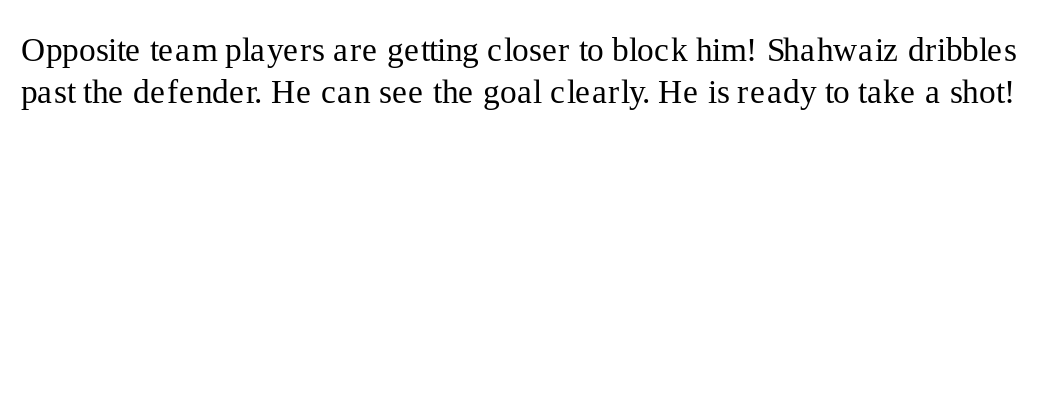

In [137]:
from PIL import Image
import io

foreground = Image.open(io.BytesIO(data))
foreground

In [138]:
foreground.thumbnail( (738, 738) )

In [139]:
background = Image.open( "./illustration6.jpg" )

In [140]:
foreground = foreground.convert("RGBA")

In [141]:
background.paste( foreground, (0, 0), foreground)

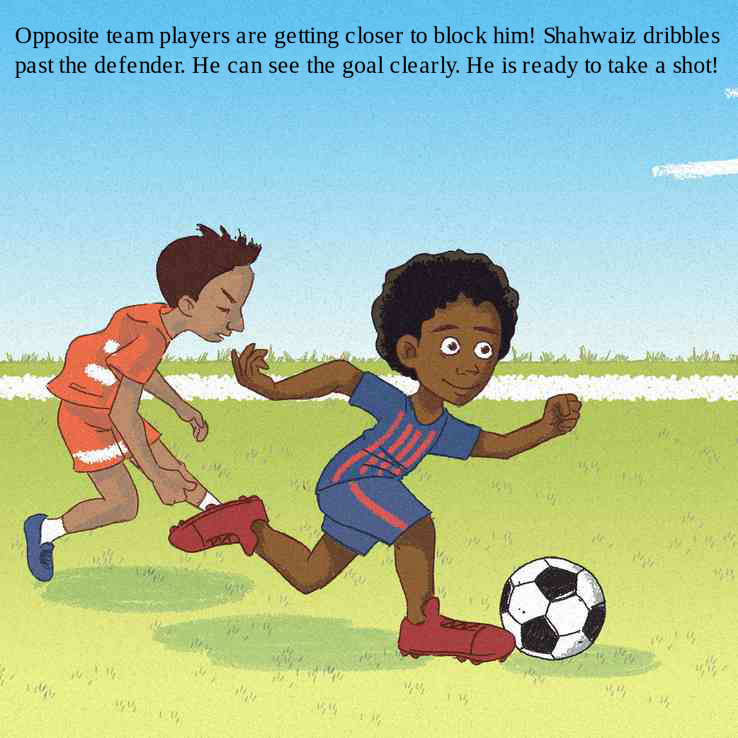

In [142]:
background